In [1]:
import pandas as pd
import numpy as np

from plotnine import *

## Themes

Themes are like memes, that make everything better.

Theming is how you polish plots. Themes are re-useable like templates. Some famous ones are NYT and fivethirtyeight

In [16]:
star_wars = pd.read_csv("star_wars.csv")
star_wars.drop(15, inplace=True)
star_wars['species_group'] = np.select(
    [star_wars.species == 'Human', star_wars.species == "Droid"],
    ['Human', 'Droid'],
    default = 'Other'
)
star_wars

,Unnamed: 0,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,species_group
0,1,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human,Human
1,2,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid,Droid
2,3,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid,Droid
3,4,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human,Human
4,5,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,Finn,NaN,NaN,black,dark,dark,NaN,male,masculine,NaN,Human,Human
79,80,Rey,NaN,NaN,brown,light,hazel,NaN,female,feminine,NaN,Human,Human
80,81,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,masculine,NaN,Human,Human
81,82,BB8,NaN,NaN,none,none,black,NaN,none,masculine,NaN,Droid,Droid


### Pre-baked themes

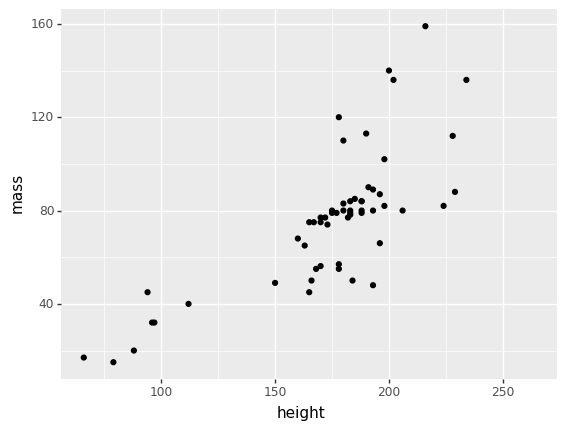

{&lt;ggplot: (314983677)&gt;}

In [4]:
{
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point() # really theme_grey(), the default
}

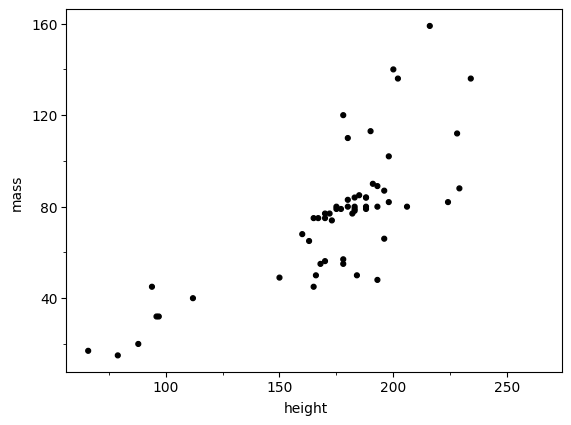

{&lt;ggplot: (318063605)&gt;}

In [9]:
{
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point() +
    theme_matplotlib() # b/c nothing is sacred
}

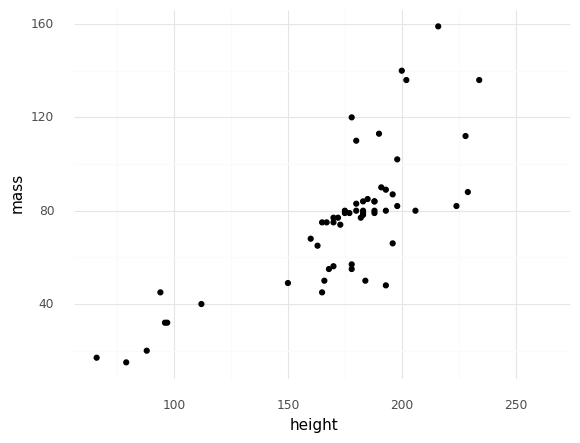

{&lt;ggplot: (318063397)&gt;}

In [13]:
{
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point() +
    theme_minimal()
}

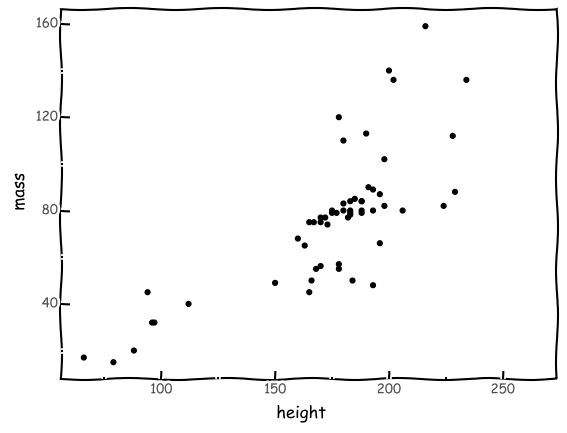

{&lt;ggplot: (318060197)&gt;}

In [10]:
{
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point() +
    theme_xkcd() # Tufte would approve
}

### Custom adjustments

You can change everything. But you probably won't need too. Here are some common things I adjust.

Theme elements will overwrite other theme elements that are already specified

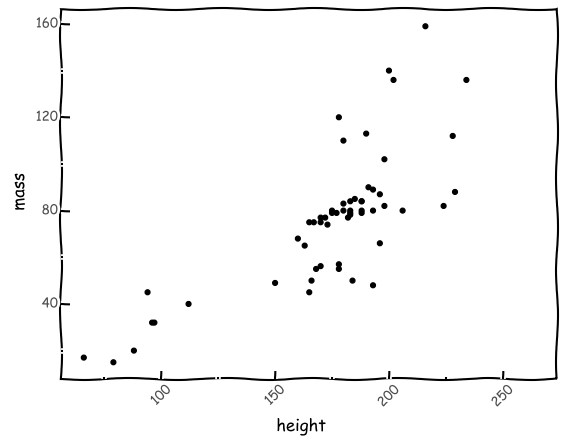

{&lt;ggplot: (318248537)&gt;}

In [14]:
{
    ggplot(star_wars, aes('height', 'mass')) +
    geom_point() +
    theme_xkcd() +
    theme(axis_text_x=element_text(angle=45)) # useful for when labels run together
}

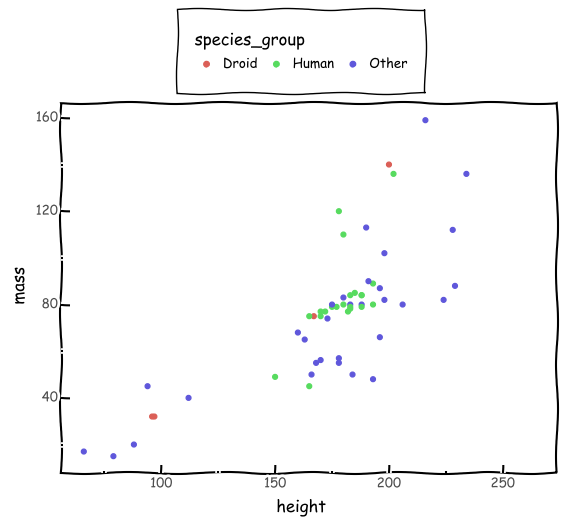

{&lt;ggplot: (318340461)&gt;}

In [18]:
{
    ggplot(star_wars, aes('height', 'mass', color='species_group')) +
    geom_point() +
    theme_xkcd() +
    theme(legend_position='top') # useful for when labels run together
}

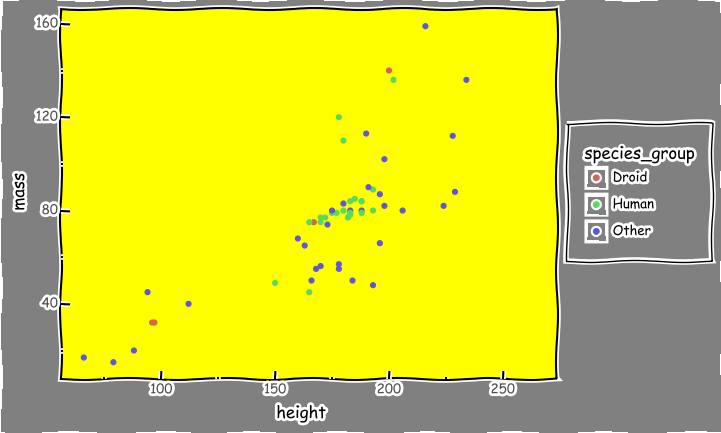

{&lt;ggplot: (318097597)&gt;}

In [21]:
{
    ggplot(star_wars, aes('height', 'mass', color='species_group')) +
    geom_point() +
    theme_xkcd() +
    theme(
        plot_background=element_rect(fill = 'grey'),
        panel_background=element_rect(fill = 'yellow')
        ) # useful for when labels run together
}

## Charts you want

These are charts that I think get a lot of mileage.

### Bar charts with labels

In [35]:
star_wars_labls = pd.DataFrame(star_wars['species_group'].value_counts()).reset_index().rename(columns={'index': 'species_group', 'species_group': 'labl'})
star_wars_labls

,species_group,labl
0,Other,41
1,Human,35
2,Droid,6


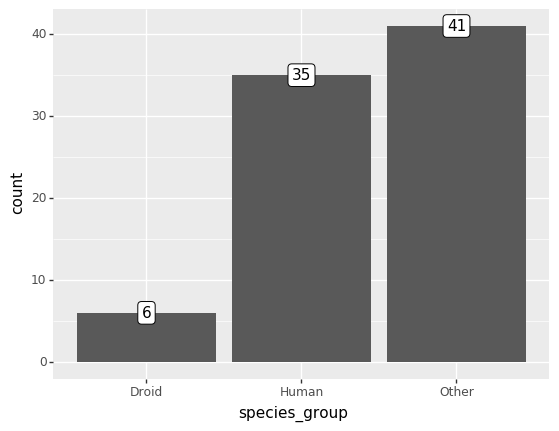

{&lt;ggplot: (318648129)&gt;}

In [54]:
{
    ggplot(star_wars, aes('species_group')) +
    geom_bar() +
    geom_label(data=star_wars_labls, mapping=aes(y='labl',label = 'labl'))
}

## Comparing distributions

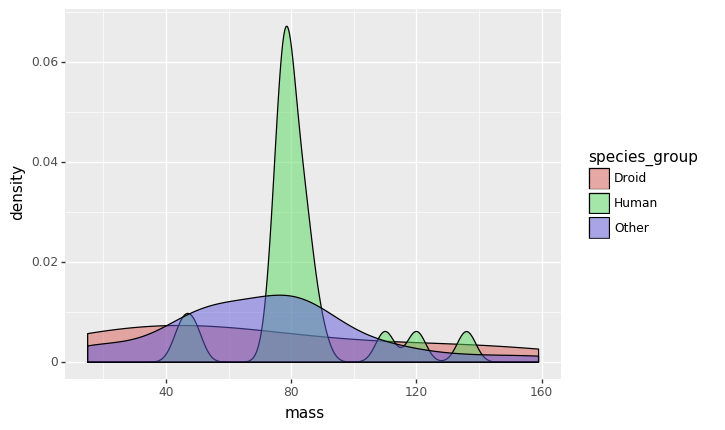

{&lt;ggplot: (320519097)&gt;}

In [59]:
{
    ggplot(star_wars, aes('mass', fill='species_group')) +
    geom_density(alpha=.5)
}

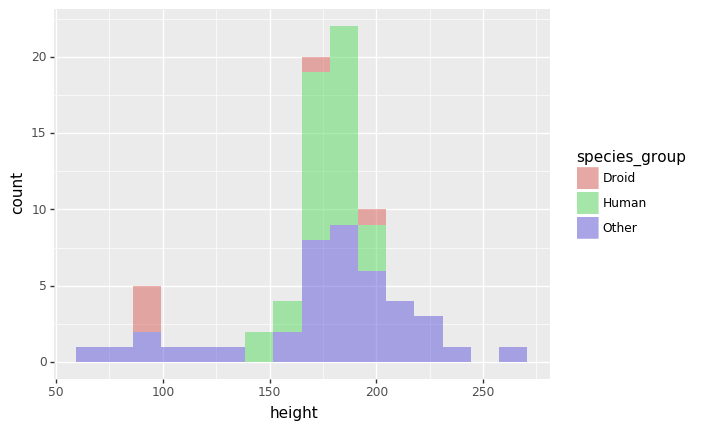

{&lt;ggplot: (320644833)&gt;}

In [64]:
{
    ggplot(star_wars, aes('height', fill='species_group')) +
    geom_histogram(alpha=.5)
}

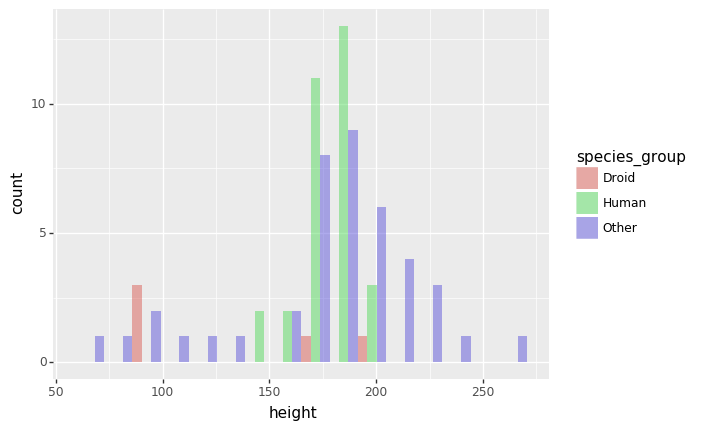

{&lt;ggplot: (320755341)&gt;}

In [65]:
{
    ggplot(star_wars, aes('height', fill='species_group')) +
    geom_histogram(alpha=.5, position='dodge')
}

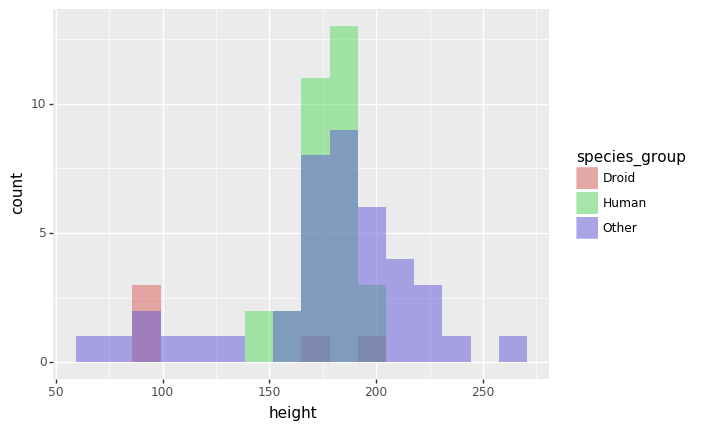

{&lt;ggplot: (320642997)&gt;}

In [66]:
{
    ggplot(star_wars, aes('height', fill='species_group')) +
    geom_histogram(alpha=.5, position='identity')
}

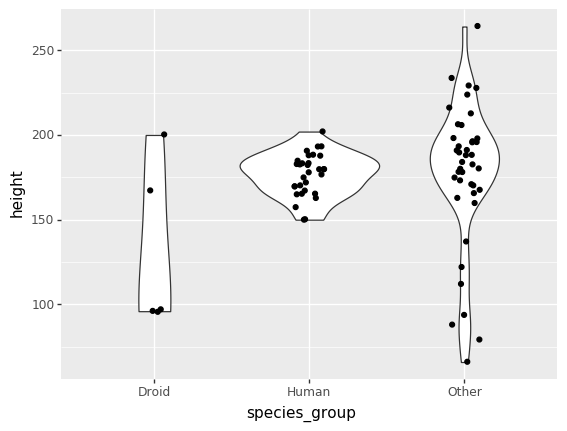

{&lt;ggplot: (320634161)&gt;}

In [73]:
{
    ggplot(star_wars, aes('species_group', 'height')) +
    geom_violin() +
    geom_jitter(width=.1)
}

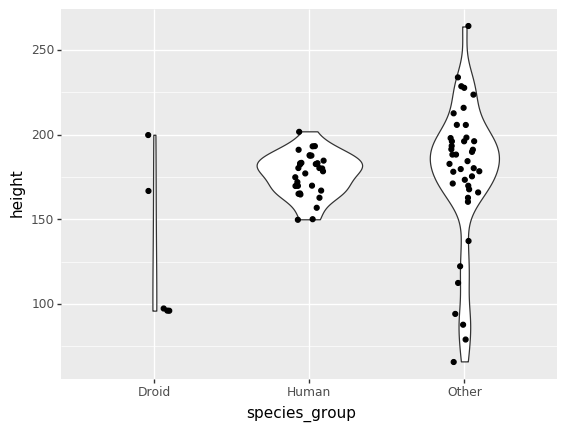

{&lt;ggplot: (319843909)&gt;}

In [74]:
{
    ggplot(star_wars, aes('species_group', 'height')) +
    geom_violin(scale='count') +
    geom_jitter(width=.1)
}

## What did I miss?

What graphs have you seen and want to make for your own purposes